In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


In [2]:
data = pd.read_csv('creditcard.csv')


In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
target_count = data['Class'].value_counts()

In [7]:
print('0:', target_count[0])
print('1:', target_count[1])
print('Imbalance degree:', '1:', round(target_count[0] / target_count[1], 2))
print (' ')
print('Target distribution in %')
print((data.groupby('Class')['Class'].count()/data['Class'].count())*100)


0: 284315
1: 492
Imbalance degree: 1: 577.88
 
Target distribution in %
Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [10]:
y = data['Class']
X = data.drop(['Class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## KNN

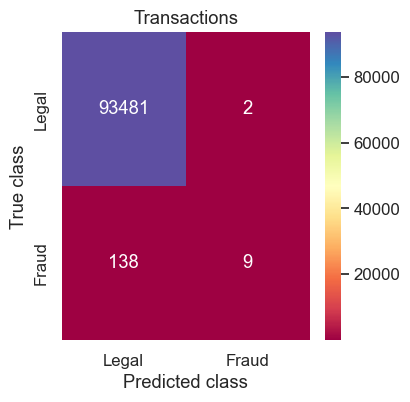

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


Y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, Y_pred_knn)

LABELS = ['Legal', 'Fraud']
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm_knn, xticklabels=LABELS, cmap = 'Spectral', yticklabels=LABELS, annot=True, fmt='d')
plt.title('Transactions')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [12]:
accuracy = accuracy_score(y_test, Y_pred_knn)
precision = precision_score(y_test, Y_pred_knn)
recall = recall_score(y_test, Y_pred_knn)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}')

Accuracy: 0.9985047527501869
Precision: 0.8181818181818182
Recall: 0.061224489795918366


## Sampling

from imblearn.under_sampling import RandomUnderSampler #import the required library
rus=RandomUnderSampler() #RandomUnderSampler object
x_train_rus,y_train_rus=rus.fit_resample(x_train,y_train)#apply to
RandomUnderSampler
y_train_rus.value_counts()
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=3)
undersample = NearMiss(version=3, n_neighbors=3)
# transform the dataset
X_train_nm, y_train_nm = undersample.fit_resample(x_train, y_train)

### Oversampling

In [13]:
oversample = SMOTE()
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)

counter = Counter(y)

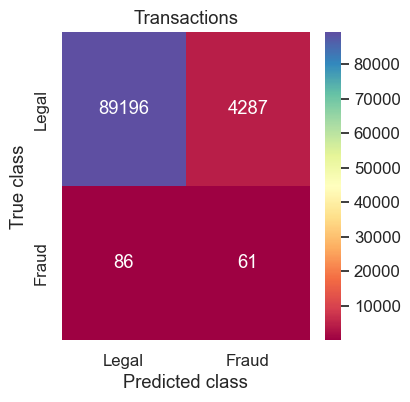

Accuracy: 0.9532948841183382
Precision: 0.014029438822447102
Recall: 0.41496598639455784


In [14]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_os, y_train_os)


Y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, Y_pred_knn)

LABELS = ['Legal', 'Fraud']
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm_knn, xticklabels=LABELS, cmap = 'Spectral', yticklabels=LABELS, annot=True, fmt='d')
plt.title('Transactions')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

accuracy = accuracy_score(y_test, Y_pred_knn)
precision = precision_score(y_test, Y_pred_knn)
recall = recall_score(y_test, Y_pred_knn)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}')

## Pipeline

In [55]:
model = KNeighborsClassifier(n_neighbors=4)                             
over = SMOTE(sampling_strategy = 0.1)
under = RandomUnderSampler(sampling_strategy = 0.5)
#steps = [('over', over), ('under', under), ('model', model)]
pipeline = make_pipeline(over, under, model)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=1)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     93483
           1       0.01      0.35      0.02       147

    accuracy                           0.95     93630
   macro avg       0.51      0.65      0.50     93630
weighted avg       1.00      0.95      0.97     93630



## Logistic regression

C:\Users\Karolina\anaconda3\envs\Magisterka\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


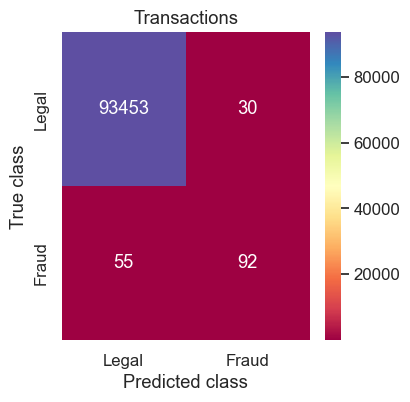

Accuracy: 0.9990921713126135
Precision: 0.7540983606557377
Recall: 0.6258503401360545


In [68]:
lr = LogisticRegression(solver = 'lbfgs', random_state = 1)

lr.fit(X_train, y_train)


Y_pred = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, Y_pred)

LABELS = ['Legal', 'Fraud']
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm_lr, xticklabels=LABELS, cmap = 'Spectral', yticklabels=LABELS, annot=True, fmt='d')
plt.title('Transactions')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}')

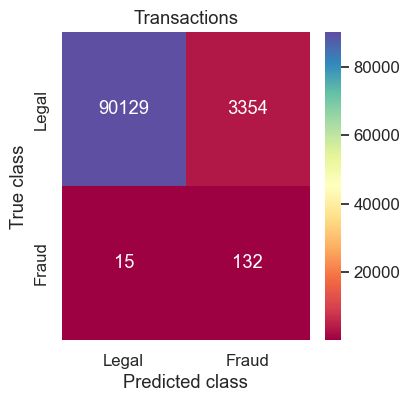

Accuracy: 0.9640179429669977
Precision: 0.0378657487091222
Recall: 0.8979591836734694


In [69]:
weights = {0:1.0, 1:1.0}

lr = LogisticRegression(solver = 'lbfgs', class_weight = 'balanced' , random_state = 1)

lr.fit(X_train, y_train)


Y_pred = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, Y_pred)

LABELS = ['Legal', 'Fraud']
plt.figure(figsize=(4, 4))
sns.set(font_scale=1.1)
sns.heatmap(cm_lr, xticklabels=LABELS, cmap = 'Spectral', yticklabels=LABELS, annot=True, fmt='d')
plt.title('Transactions')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}')